# Contexts

    L'idee de ce projet est d'aide les gens qui veulent en savoir plus sur les maths (et les algorithms) qui sont caches derriere outils de machine learning.
    Permettre de comprendre un peu plus en profondeur la therorie derriere le machie learning.
    Dans ce jupyter nous allons commencer avec la Regression Linear, un algorithme beaucoup plus simple.

# Explications

    La regression linear est etablie par une equation : 
$$ y = a*X + b $$


    L'objectif du model sera de trouver les bons parameters pour : 
$$a , b$$


    
    On a donc besoin d'une fonction de cout (ou fonction erreur) Pour nous permettre d'evaluer le model et par la suite apprendre sur les parameters. Cette fonction est definie par : 
    

![title](quicklatex.com-dc79559d002feb0b9693f668a3a4a537_l3.png)

    Explication : supposons que notre model predit une valeur de y=600 alors qu'il devrait predire 550 ?
    On dit alors que notre model a fait une erreur de -50 (550-600) on peut donc parfois obtenir des erreurs negatives, pour palier a ce probleme... on a deux solutions :
        Soit on prens la valeurs absolue de l'erreur : |550-600|=50 (Celui est la procedure avec mean absolute error)
        Soit on prends la racine carree du resultat soit (-50)**2 = 2500 (on a donc une erreur trop grand il faut donc le penaliser) mais avant on applique cela a tous notre dataset ainsi on la somme precedente.

    la representation de cette fonction est convexe (une fonction qui a un seul minima possible)

![title](5141ef4a2c46eeb5f611f3454eda810c.gif)

    Cette fonction est donc un algorithm iterative, il faut applique des derives partielles et avance celle une certain valeur (c'est ce qu'on appelle taux d'apprentissage ou encore learning rate). 

![SegmentLocal](gradient-descent.gif "segment")

    Il faut donc trouver les gradients pour chaque parameters : a,b

![title](grd-desc-1-768x460.jpg)

    A savoir : Tout ce qu'on fait en realite, c'est de derive la fonction et calculer le nouveau parameters en retranchant a chaque fois l'encienne valeur et comme la decente de gratient a un seul mina possible (une fonction convexe)... apres plus repetition on va donc tomber sur le minima.
    Mais attention, vous remarquez qu'on multiplie par le learning reate apres avoir calucle la somme des erreurs, cette valeur est important... il faut savoir le choisir, en generale cette valeur est tres faible et varie entre 0.001 a 0.1.
    Si cette valeur est trop grand on risque de ne pas tomber sur le minima... on ferra des sauts sans jamais tomber decus, par contre si cette valeur est tres petite on risque de mettre bcp de temps avant d'y arriver on aura donc besoin de beaucoup d'iteration.
    
    

    Si vous avez encore des doutes ou que vous n'avez pas tout compris : Je vous recomande de suivre cette 
    video youtube qui l'explique bien avant de continuer sur le code : 
   [Gradient decente Thibault Neveu](https://www.youtube.com/watch?v=JGgT7L7wKQM)
   ou encore sur wiki [https://fr.wikipedia.org/wiki/Algorithme_du_gradient](https://fr.wikipedia.org/wiki/Algorithme_du_gradient)

# Import tools

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd
import seaborn as sns

## Create data

In [171]:
np.random.seed(0)
x, y = make_regression(n_samples=180, n_features=1, noise=10)

In [172]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [173]:
x_train.shape

(144, 1)

In [174]:
x_test.shape

(36, 1)

In [175]:
print(y_train.shape, y_test.shape)

(144,) (36,)


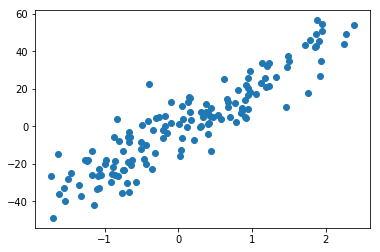

In [176]:
plt.scatter(x_train, y_train)

## Create model

In [177]:
class RegressionLinearCustom():
    """
        Implementation Linear Regression Model with gradient decente solution.
        The gradient decente use partial derivate.
        This model have two essentiel parameters :
            - Learning rate : learning_rate (0.01 default)
            - max interation : max_iter (1000 default)
        The other parameters:
            - coefs_ this is coeffients of parameters data
            - intercept_ this is intercept of function, can edit it True or False
            - error_gradient this is gradient parameters learning.
    """
    
    def __init__(self, learning_rate=0.01, max_iter=1000):
        """
            Initializer parameters model
        """
        self.lrate=learning_rate
        self.max_iter=max_iter
        self.coefs_=None
        self.intercept_= 0
        self.error_gradient = None
        self.is_fited = False
        
    def error_coefs(self, coefs,intercept_, xi, yi, m, lr):
        """
            Calcul coefs gradient:
            -- Parameters :
                - xi : value for one sample in data
                - yi : real value prediction for this precedent sample
                - m : dataset size
                - lr : learning rate
        """
        return lr/m * (xi*(coefs*xi+intercept_-yi))
    
    def error_intercept(self,coefs, intercept_, xi, yi, m, lr):
        """
            Calcul intercept gradient
            -- Parameters:
                - xi : value for one sample in data
                - yi : real value prediction for this precedent sample
                - m : dataset size
                - lr : learning rate
        """
        return lr/m * sum(coefs*xi+intercept_-yi)
    
    def cout_function(self, m, coefs, intercept_, xi, yi):
        """
            Gradient function
            -- Parameters:
                - xi : value for one sample in data
                - yi : real value prediction for this precedent sample
                - m : dataset size
        """
        return sum((yi - coefs*xi+intercept_)**2)/2*m
    
    def score(self, x, y):
        """
            Score function
        """
        return 1 - sum((y-self.predict(x))**2)/sum((y-y.mean())**2)
        
    
    def fit(self,x, y):
        """
            Fit fuction, learning parameters
            -- Parameters:
                - x, sample data
                - y, predict data
        """
        
        if x.shape[0] != y.shape[0]:
            return ValueError("x and y must have same sample")
        
        m = x.shape[0] # size du dataset
        self.coefs_ = np.zeros(x.shape[1]) # nuers of features
        error_intermed = None
        for _ in range(self.max_iter):
            for xi,yi in zip(x,y):
                self.coefs_ -= self.error_coefs(self.coefs_,self.intercept_, xi, yi, m, self.lrate) 
                self.intercept_ -= self.error_intercept(self.coefs_, self.intercept_, xi, yi,m, self.lrate) 
                self.error_gradient = self.cout_function(m, self.coefs_, self.intercept_, xi, yi)
         
        self.is_fited = True
        print('RegressionLinear(learning_rate={}, max_iter={})'.format(self.lrate, self.max_iter))
    
    def predict(self, x):
        """
            Predict function : 
            -- Parameters:
                - x, sample data what to predict
        """
        if not self.is_fited:
            return ValueError("model must fited after predict")
        if x.shape[1] != self.coefs_.shape[0]:
            return ValueError("the features of x do not have the same size as those to train")
        return (x*self.coefs_).sum(axis=1)+self.intercept_ # equation -- coefs*X + intercept

In [178]:
lr = RegressionLinearCustom()

In [179]:
lr.fit(x_train,y_train)

RegressionLinear(learning_rate=0.01, max_iter=1000)


In [180]:
lr.coefs_

array([21.1303301])

In [181]:
lr.intercept_

-0.8352580818314677

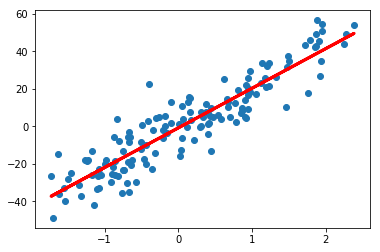

In [182]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.predict(x_train), c='red', lw=3)

     Evalute custum model

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
print('MAE : ', mean_absolute_error(y_test, lr.predict(x_test)))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))
print('Median absolute error : ', median_absolute_error(y_test, lr.predict(x_test)))

MAE :  7.877842240242018
RMSE :  10.042785587416502
Median absolute error :  6.54594841083626


In [223]:
print('Score Custum model : ', lr.score(x_test, y_test))

Score Custum model :  0.7612679859914026


## Comparaison avec Sklearn

In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
lr2 = LinearRegression()

In [191]:
lr2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
lr2.coef_

array([21.12867091])

In [193]:
lr2.intercept_

-0.8328942101095778

Text(0.5,1,'LinearRegression model')

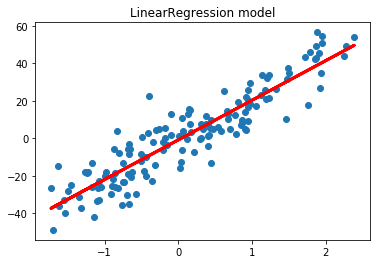

In [194]:
plt.scatter(x_train,y_train)
plt.plot(x_train, lr2.predict(x_train), c='red', lw=3)
plt.title('LinearRegression model')

    Evaluate Linear regression sklearn

In [195]:
print('MAE : ', mean_absolute_error(y_test, lr2.predict(x_test)))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, lr2.predict(x_test))))
print('Median absolute error : ', median_absolute_error(y_test, lr2.predict(x_test)))

MAE :  7.878092566619603
RMSE :  10.043458219943728
Median absolute error :  6.544939758863786


In [224]:
print('Score sklearn model : ', lr2.score(x_test, y_test))

Score sklearn model :  0.7612360059607552


## Multiple Linear regression

In [197]:
np.random.seed(0)
x1, y1 = make_regression(n_samples=1280, n_features=3, noise=10)

In [198]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

In [199]:
x1_train.shape

(1024, 3)

In [200]:
y1_train.shape

(1024,)

In [201]:
lr3 = RegressionLinearCustom(learning_rate=0.01)

In [202]:
lr3.fit(x1_train, y1_train)

RegressionLinear(learning_rate=0.01, max_iter=1000)


In [203]:
lr3.coefs_

array([64.59675767, 62.55187783, 60.5581771 ])

In [204]:
lr3.intercept_

-3.8782243776243024

    - Evaluate LinearRegressionCustum for multiple Regression

In [205]:
print('MAE : ', mean_absolute_error(y1_test, lr3.predict(x1_test)))
print('RMSE : ', np.sqrt(mean_squared_error(y1_test, lr3.predict(x1_test))))
print('Median absolute error : ', median_absolute_error(y1_test, lr3.predict(x1_test)))

MAE :  9.187022392401918
RMSE :  11.324822688558232
Median absolute error :  7.700921217861264


In [225]:
print('Score Custum model multiple regression : ', lr3.score(x1_test, y1_test))

Score Custum model multiple regression :  0.9901428799842829


## Sklearn

In [207]:
from sklearn.linear_model import SGDRegressor
sg = SGDRegressor()

In [208]:
lrr3 = LinearRegression()

In [209]:
lrr3.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
sg.fit(x1_train, y1_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [211]:
lrr3.coef_

array([66.6285208 , 64.15098078, 63.81493204])

In [212]:
sg.coef_

array([66.60881996, 64.15799953, 63.74762287])

In [213]:
lrr3.intercept_

0.4128450631445766

In [214]:
sg.intercept_

array([0.44550697])

    - Evaluate LinearRegression

In [216]:
print('MAE : ', mean_absolute_error(y1_test, lrr3.predict(x1_test)))
print('RMSE : ', np.sqrt(mean_squared_error(y1_test, lrr3.predict(x1_test))))
print('Median absolute error : ', median_absolute_error(y1_test, lrr3.predict(x1_test)))

MAE :  7.9704692752093855
RMSE :  9.851604662213807
Median absolute error :  6.889328330159444


In [226]:
print('Score sklearn model LinearRegression : ', lrr3.score(x1_test, y1_test))

Score sklearn model LinearRegression :  0.9925406467656483


    - Evaluate SGDRegressor

In [219]:
print('MAE : ', mean_absolute_error(y1_test, sg.predict(x1_test)))
print('RMSE : ', np.sqrt(mean_squared_error(y1_test, sg.predict(x1_test))))
print('Median absolute error : ', median_absolute_error(y1_test, sg.predict(x1_test)))

MAE :  7.972534909526331
RMSE :  9.855358962547134
Median absolute error :  6.859896458867109


In [227]:
print('Score sklearn SGDRegressor : ', sg.score(x1_test, y1_test))

Score sklearn SGDRegressor :  0.992534960384724


# Piste d'amelioration

    - Ameliorer ce model pour prendre en compte la regression non-linear (avec l'algorithme de regression stockat).
    - Jouer sur le learning rate ou le max_inter lorsque le model under-fit.
    - Ajouter un peu plus de performance sur modele, notament permettre de normalizer les donnes avant de faire le fit.
